# CO2 Emissions Data Analysis Project

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import seaborn as sb

### Import Dataset

In [2]:
data = pd.read_csv('co2_by_sector.csv')
data['date'] = pd.to_datetime(data['date'], format = "%d/%m/%Y")
pd.plotting.register_matplotlib_converters()

# Create month-year column and change intervals from days to months
data['year'] = data['date'].dt.year
data['month-year'] = data['date'].dt.to_period('M')
data.head()

,country,date,sector,value,timestamp,year,month-year
0,Brazil,2019-01-01,Power,0.096799,1546300800,2019,2019-01
1,China,2019-01-01,Power,14.816100,1546300800,2019,2019-01
2,EU27 & UK,2019-01-01,Power,1.886490,1546300800,2019,2019-01
3,France,2019-01-01,Power,0.051217,1546300800,2019,2019-01
4,Germany,2019-01-01,Power,0.315002,1546300800,2019,2019-01


### Data Exploration

In [3]:
# Top CO2 emission countries for the past 5 years
data.groupby('country')['value'].describe().sort_values(by = 'mean', ascending = False).head(7)

,count,mean,std,min,25%,50%,75%,max
country,,,,,,,,
WORLD,9672.0,16.081433,14.037780,0.243169,1.273543,15.979450,29.873100,46.26350
China,9672.0,4.963097,5.521288,0.014837,0.165301,2.465250,11.404700,19.08510
ROW,9672.0,4.796590,4.025250,0.022096,0.545837,4.910065,9.228238,11.66370
US,9672.0,2.236541,1.739606,0.054637,0.433867,2.516000,3.801960,6.64273
EU27 & UK,9672.0,1.447901,1.040176,0.001895,0.397427,1.637780,2.363532,4.26851
India,9672.0,1.148466,1.291341,0.000091,0.028547,0.734197,2.087080,4.66783
Russia,9672.0,0.810696,1.016722,0.003102,0.043076,0.637134,0.827260,4.53703


In [4]:
# Bottom CO2 emission countries for the past 5 years
data.groupby('country')['value'].describe().sort_values(by = 'mean', ascending = True).head()

,count,mean,std,min,25%,50%,75%,max
country,,,,,,,,
Spain,9672.0,0.113703,0.082701,0.000497,0.049916,0.102004,0.168129,0.344131
France,9672.0,0.137354,0.122037,0.000078,0.036228,0.092573,0.232011,0.495378
Italy,9672.0,0.147137,0.116003,0.000115,0.027799,0.150124,0.251445,0.508076
UK,9672.0,0.165974,0.117352,0.000086,0.066561,0.159741,0.268603,0.478916
Brazil,9672.0,0.189875,0.172759,0.001055,0.027830,0.101734,0.357662,0.594167


## Time Series Visualization

#### Total CO2 Emissions over Time

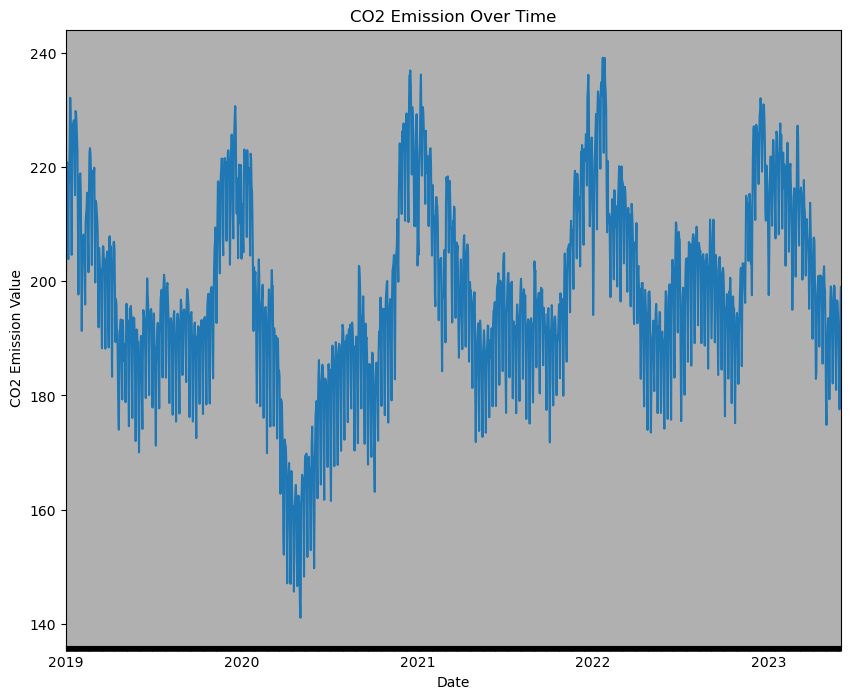

In [5]:
total_emissions = data.groupby(['date'])['value'].sum()

# Create plot
total_emissions.plot.line(figsize = (10,8),)
plt.xlabel('Date')
plt.ylabel('CO2 Emission Value')
plt.title('CO2 Emission Over Time')
plt.xticks(total_emissions.index)
plt.grid(True)
plt.show()

#### Total CO2 Emissions Over Time by Sector - Years

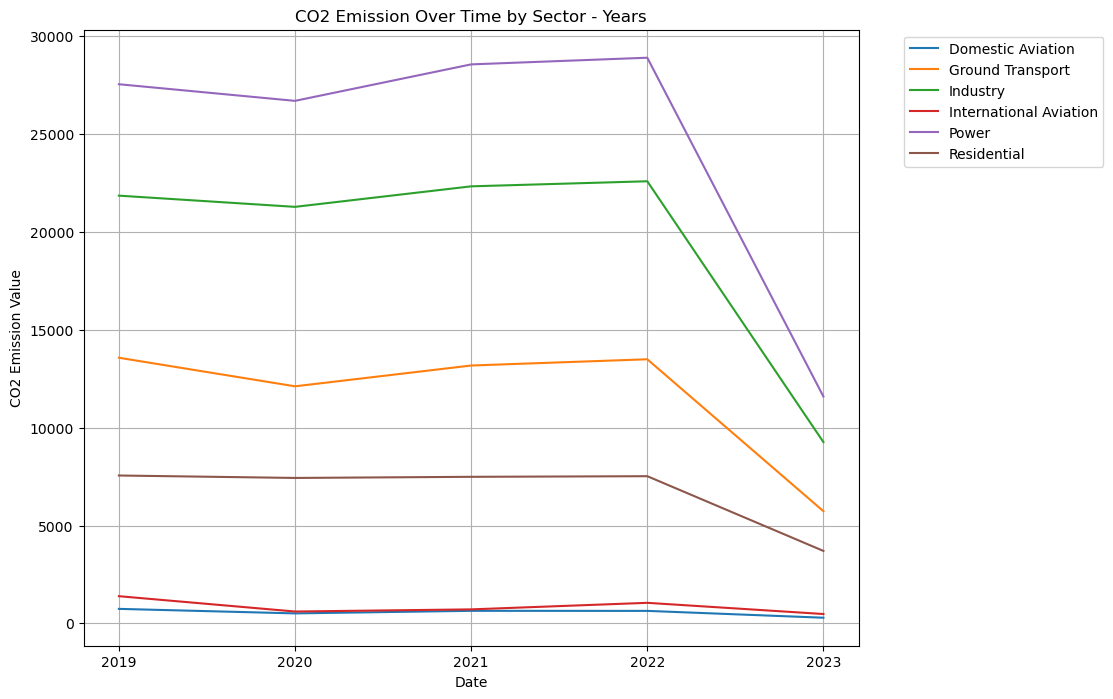

In [6]:
# Add column of total CO2 emissions by sector
total_emissions_sector_yr = data.groupby(['year','sector'])['value'].sum().unstack()

# Create plot
total_emissions_sector_yr.plot(figsize = (10,8))
plt.xlabel('Date')
plt.ylabel('CO2 Emission Value')
plt.title(f'CO2 Emission Over Time by Sector - Years')
plt.xticks(total_emissions_sector_yr.index)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.grid(True)
plt.show()

Note: The data was acquired midway through 2023, which explains why there is a dip in CO2 emissions for 2023.

#### Total CO2 Emissions Over Time by Year - Months

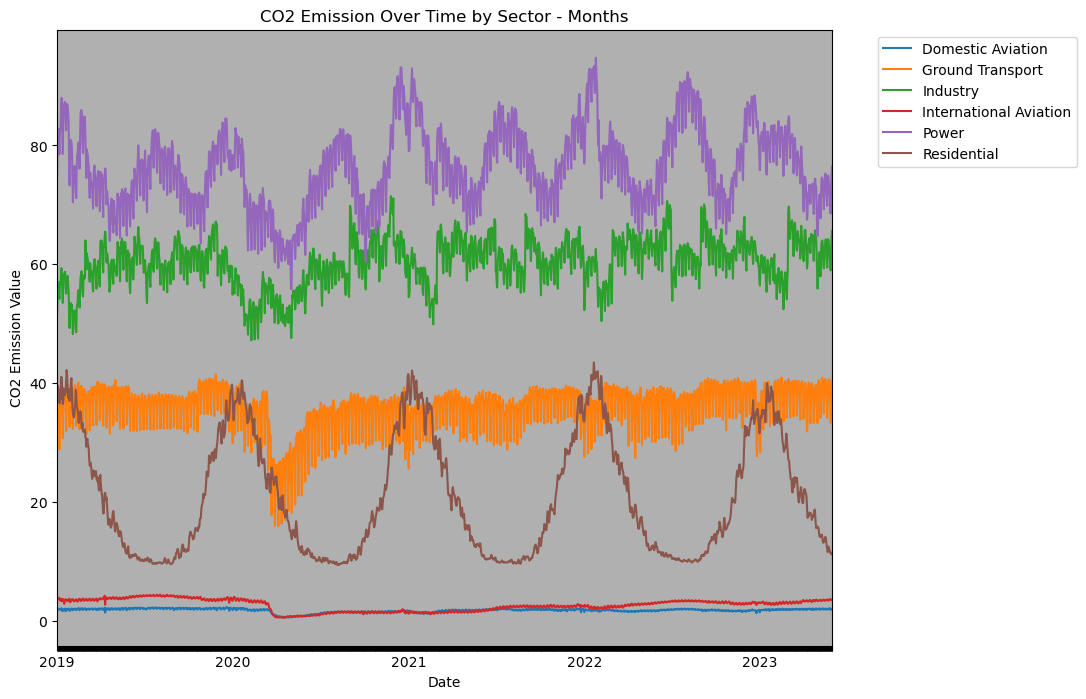

In [8]:
# Add column of total CO2 emissions by sector
total_emissions_sector_mo = data.groupby(['date','sector'])['value'].sum().unstack()

# Create plot
total_emissions_sector_mo.plot(figsize = (10,8))
plt.xlabel('Date')
plt.ylabel('CO2 Emission Value')
plt.title(f'CO2 Emission Over Time by Sector - Months')
plt.xticks(total_emissions_sector_mo.index)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.grid(True)
plt.show()

#### Total CO2 Emissions over Time by County

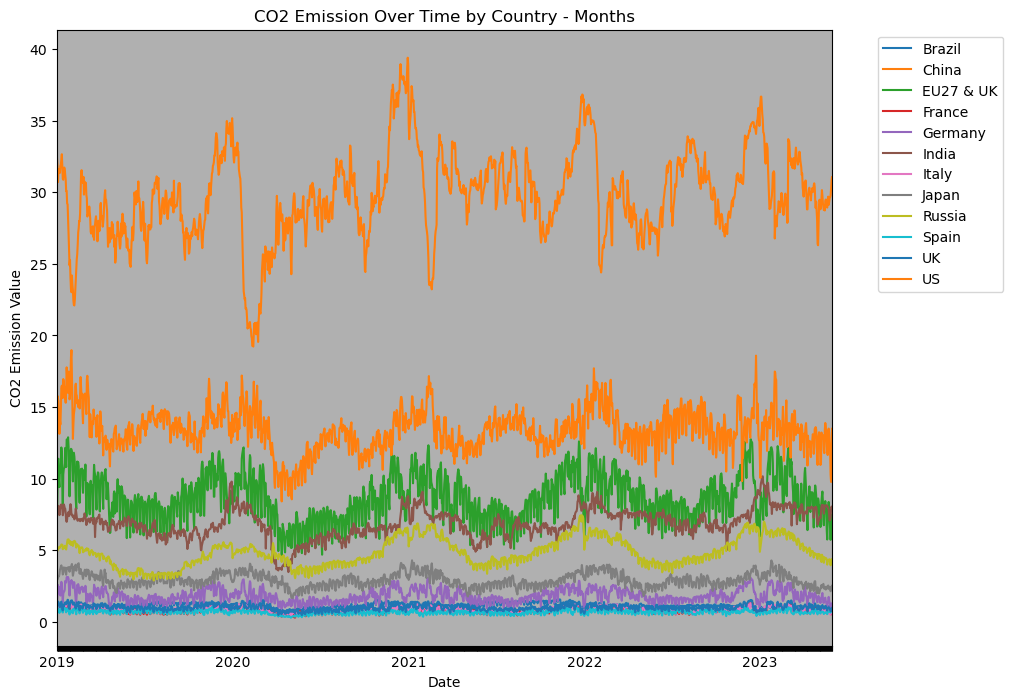

In [9]:
total_emissions_country_mo = data.loc[(data['country'] != 'WORLD') & (data['country'] != 'ROW')]
total_emissions_country_mo = total_emissions_country_mo.groupby(['date','country'])['value'].sum().unstack()

# Create plot
total_emissions_country_mo.plot(figsize = (10,8))
plt.xlabel('Date')
plt.ylabel('CO2 Emission Value')
plt.title(f'CO2 Emission Over Time by Country - Months')
plt.xticks(total_emissions_sector_mo.index)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.grid(True)
plt.show()

## Time Series Analysis - Power Sector in the US

In [10]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from datetime import datetime
from time import time
import numpy as np

#### Line Plot

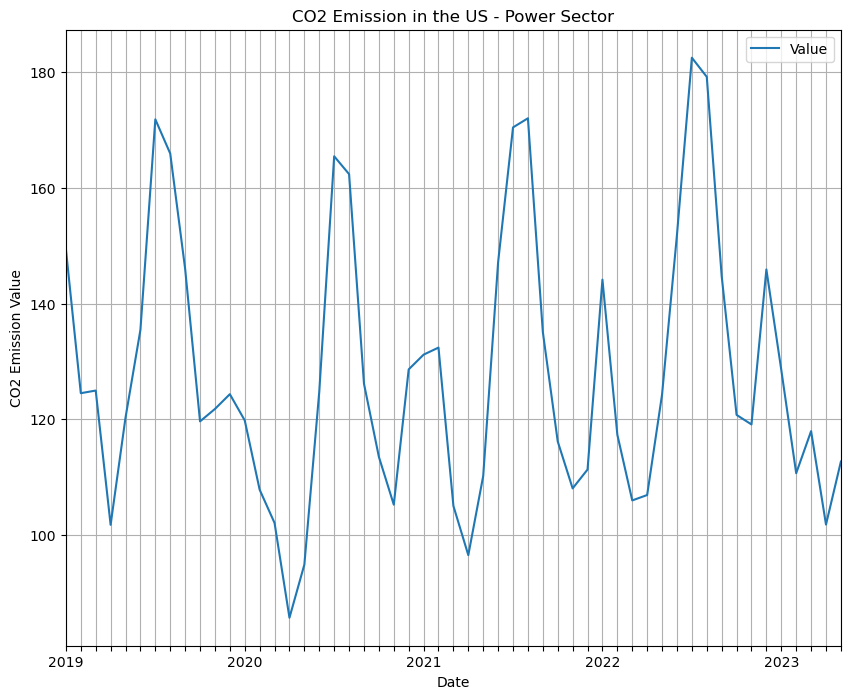

In [19]:
power_plot = data.loc[(data['sector'] == 'Power') & (data['country'] == 'US')]
power_plot = power_plot[['country', 'month-year', 'value']]
power_plot = power_plot.groupby(['month-year', 'country']).sum().unstack()

# Create plot
power_plot.plot(figsize = (10,8))
plt.xlabel('Date')
plt.ylabel('CO2 Emission Value')
plt.title(f'CO2 Emission in the US - Power Sector')
plt.xticks(power_plot.index)
plt.legend(['Value'])
plt.grid(True)
plt.show()

The time series plot for the power sector in the United States appear to have no clear trend over the past four years. However, it appears that there are high peaks and low valleys in the plot between each year, which may indicate seasonality in the data. In order to continue with the time series analysis, the stationarity assumption must be checked for in the data. Therefore, the augmented Dickey-Fuller test is utilized to determine stationarity in the data. 

In [12]:
power_data_US = data.loc[(data['sector'] == 'Power') & (data['country'] == 'US')]
power_data_US = power_data_US[['date', 'value']]
power_data_US = power_data_US.set_index('date').groupby(pd.Grouper(freq='M'))['value'].sum()

#### Check Stationarity

In [13]:
adf_test = adfuller(power_data_US)
print(f'p-value: {adf_test[1]}')

p-value: 0.7971739852329391


The ADF Test concludes that the data is not stationary, which means that the data is expected to change over time. This assumption is crucial in assembling the best time series model for the data. Therefore, we will apply first-order differencing on the data to make it stationary. 

#### Remove Trend - First Order Differencing

In [14]:
diff_data = power_data_US.diff()[1:]
adf_test = adfuller(diff_data)
print(f'p-value: {adf_test[1]}')

p-value: 4.9982747166855255e-11


The ADF test for stationarity concludes that the data is stationary after applying first-order differencing. Compared to the results from the ADF test for trend decomposition, first-order differencing appears to be more effective at handling stationarity.

### Line Plot - Trend Removed

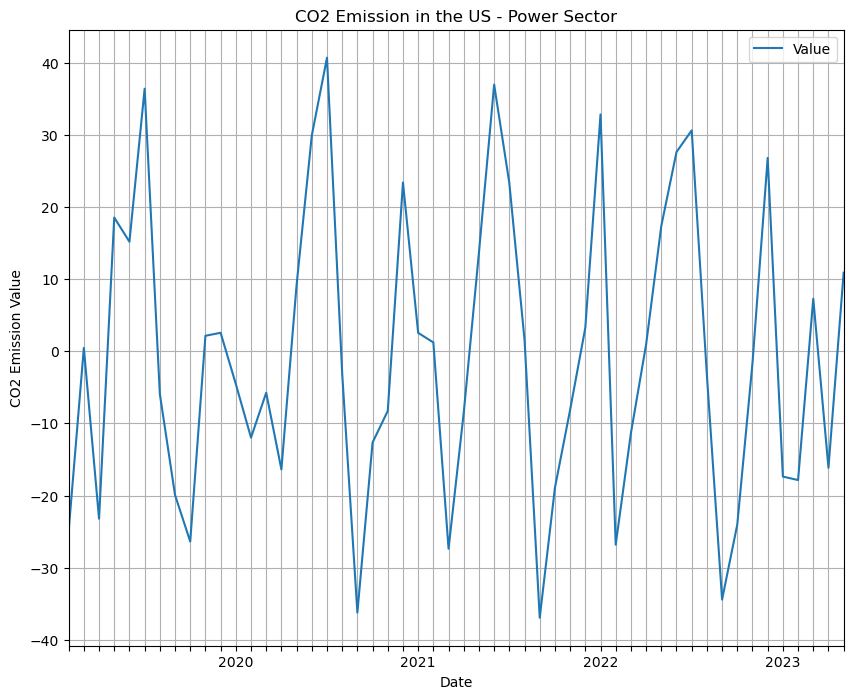

In [15]:
# Create plot
diff_data.plot(figsize = (10,8))
plt.xlabel('Date')
plt.ylabel('CO2 Emission Value')
plt.title(f'CO2 Emission in the US - Power Sector')
plt.xticks(diff_data.index)
plt.legend(['Value'])
plt.grid(True)
plt.show()

#### Autocorrelation Plots

Text(0.5, 0, 'Months')

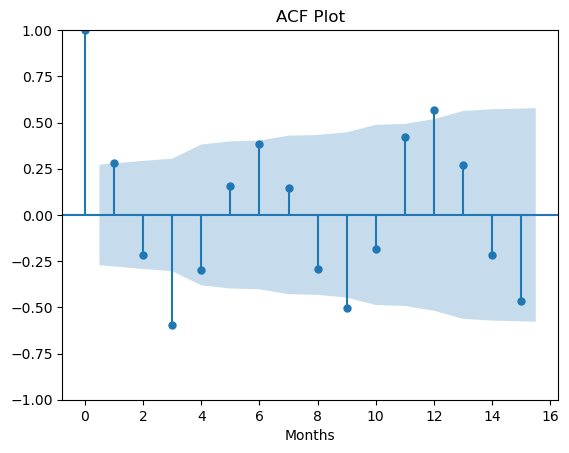

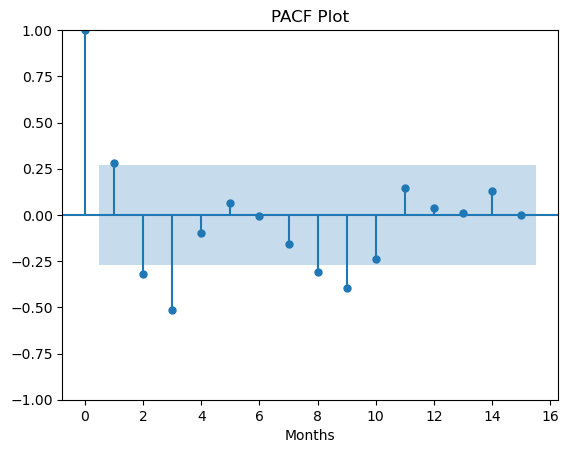

In [21]:
# ACF plot
plot_acf(diff_data, lags=15)
plt.title('ACF Plot')
plt.xlabel('Months')

# PACF plot
plot_pacf(diff_data, lags=15, method='ywm')
plt.title('PACF Plot')
plt.xlabel('Months')

The ACF plot indicates that the first, third, ninth, and twelfth lags are significant. The PACF plot indicates that the first, second, third, eighth, and ninth lags are significant. Both ACF and PACF plots show that the third lags result in the highest autocorrelation. This, along with the presence of seasonality in the data, suggests that a SARIMA model is best suited for the data. The parameters of the model are defined by the significant lags in the ACF and PACF plots. The pattern is best described as having a seasonal pattern every 6 months, with significant lags in the MA component **every third lag** and significant lags in the AR component **every 3 lags**. 

## SARIMA Model

In [22]:
train_data = diff_data[:40]
test_data = diff_data[40:52]

In [23]:
p, d, q = 3, 1, 9
P, D, Q, s = 1, 0, 0, 12

diff_model = sm.tsa.SARIMAX(train_data, order = (p, d, q), seasonal_order=(P, D, Q, s))
model_fit = diff_model.fit()

print(model_fit.summary())

/Users/coreyhuang/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/coreyhuang/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.38327D+12    |proj g|=  1.04546D+17

At iterate    5    f=  3.56918D+05    |proj g|=  2.88940D+07

At iterate   10    f=  4.85570D+04    |proj g|=  1.45567D+06

At iterate   15    f=  6.36090D+03    |proj g|=  7.09243D+04

At iterate   20    f=  7.29309D+02    |proj g|=  3.15860D+03

At iterate   25    f=  7.85621D+01    |proj g|=  1.41378D+02

At iterate   30    f=  1.23872D+01    |proj g|=  1.94465D+01

At iterate   35    f=  4.86145D+00    |proj g|=  7.90504D-01

At iterate   40    f=  4.07671D+00    |proj g|=  2.14344D-01

At iterate   45    f=  4.01499D+00    |proj g|=  1.53116D-01

At iterate   50    f=  3.96635D+00    |proj g|=  2.96478D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/Users/coreyhuang/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


The model summary describes the there to be a negative relationship between the third lag and today for the AR component and a positive relationship between the third lag and today for the MA componenet. A significant p-value in both components indicate that they are significant to the time series model. 

#### Model Evaulation

In [24]:
# Make predictions and get residuals
pred = model_fit.forecast(len(test_data))
pred = pd.Series(pred, index=test_data.index)
resid = test_data - pred

Text(0, 0.5, 'Error')

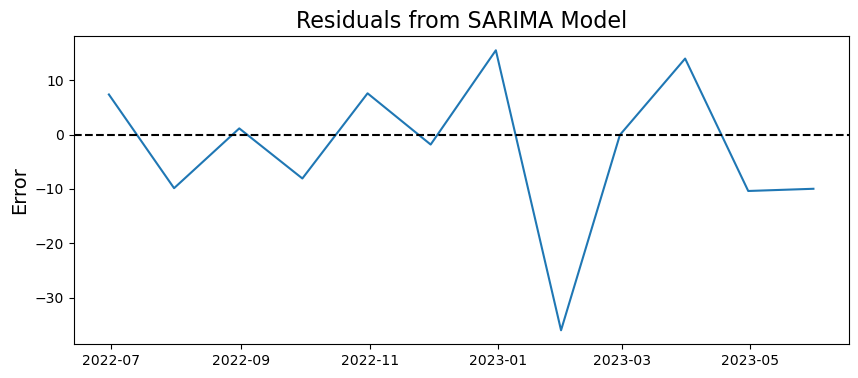

In [25]:
plt.figure(figsize=(10,4))
plt.plot(resid)
plt.axhline(0, linestyle='--', color='k')
plt.title('Residuals from SARIMA Model', fontsize=16)
plt.ylabel('Error', fontsize = 14)

Text(0.5, 1.0, 'United States CO2 Emissions - Power Sector')

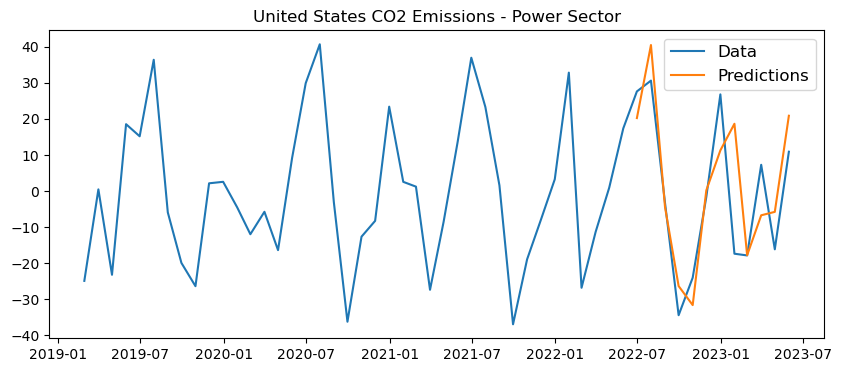

In [26]:
plt.figure(figsize=(10,4))

plt.plot(diff_data)
plt.plot(pred)
plt.legend(('Data', 'Predictions'), fontsize = 12)
plt.title('United States CO2 Emissions - Power Sector')

In [27]:
print('Mean Absolute Percent Error:', round(np.mean(abs(resid/test_data)),4))

Mean Absolute Percent Error: 0.7275


In [28]:
print('Root Mean Squared Error:', np.sqrt(np.mean(resid**2)))

Root Mean Squared Error: 13.606319446906607


#### Forecasting

In [29]:
forecast = model_fit.get_forecast(steps=60)
forecast_dates = forecast.predicted_mean.index

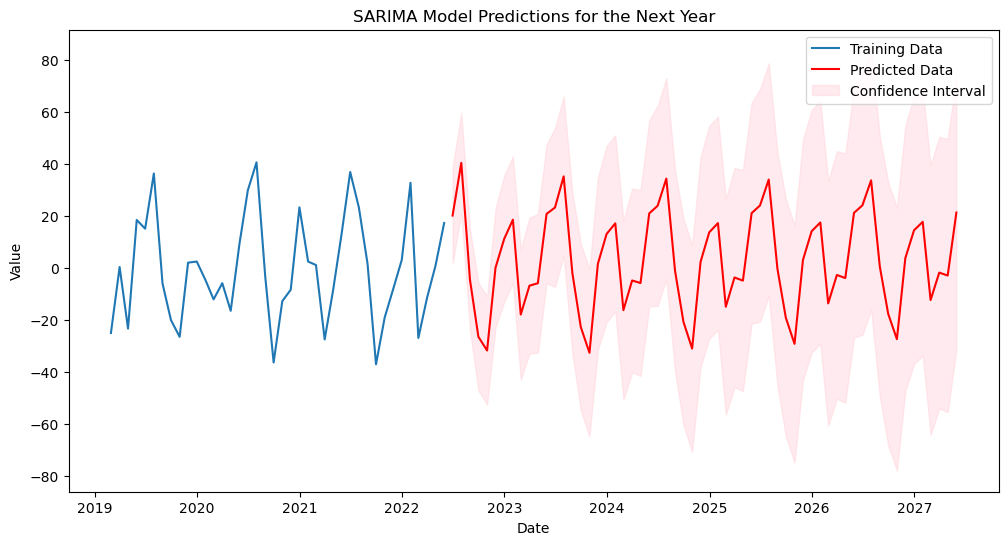

In [30]:
plt.figure(figsize=(12, 6))
plt.plot(train_data, label='Training Data')
plt.plot(forecast_dates, forecast.predicted_mean, label='Predicted Data', color='red')

# Confidence intervals (if available from the forecast)
lower_confidence = forecast.conf_int().iloc[:, 0]
upper_confidence = forecast.conf_int().iloc[:, 1]
plt.fill_between(forecast.predicted_mean.index, lower_confidence, upper_confidence, color='pink', alpha=0.3, label='Confidence Interval')

plt.xlabel('Date')
plt.ylabel('Value')
plt.title('SARIMA Model Predictions for the Next Year')
plt.legend()
plt.show()